In [1]:
# Dependencies
import os
import string

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud

In [2]:
# Import file
csv_data = pd.read_csv(os.path.join('.','employee_reviews.csv'))
df = pd.DataFrame(csv_data)

# Create company specific dataframes
google_df = df.loc[df['company']=='google',:]
microsoft_df = df.loc[df['company']=='microsoft',:]
amazon_df = df.loc[df['company']=='amazon',:]
apple_df = df.loc[df['company']=='apple',:]
facebook_df = df.loc[df['company']=='facebook',:]

In [3]:
# Checking to see if significant amounts of data is missing (all missing data are for Netflix)
microsoft = microsoft_df['company'].count()
amazon = amazon_df['company'].count()
apple = apple_df['company'].count()
facebook = facebook_df['company'].count()
google = google_df['company'].count()
print(microsoft+amazon+apple+facebook+google)
print(df['company'].count())

66719
67529


In [4]:
# Creates a stopwords set.
stop_words=set(stopwords.words("english"))
stopcaps = []
for word in stop_words:
    word = word.translate(str.maketrans(string.ascii_lowercase, string.ascii_uppercase))
    stopcaps.append(word)

In [5]:
# Define function for splitting reviews to text file.
def getreviews(import_df, company_name, prosorcons):
    holder_df = import_df
    if prosorcons == 'pros':
        with open(f'pros/{company_name}_pros.txt', 'w') as text:
            for index, row in holder_df.iterrows():
                text_holder = row['pros']
                text.write(text_holder+'\n')
        text.close()
    if prosorcons == 'cons':
        with open(f'cons/{company_name}_cons.txt', 'w') as text:
            for index, row in holder_df.iterrows():
                text_holder = row['cons']
                text.write(text_holder+'\n')
        text.close()
        
# Define function to clean text.
def cleantext(company_name, prosorcons):
    if prosorcons == 'pros':
        with open(f'{prosorcons}/{company_name}_{prosorcons}.txt', 'r') as pros:
            prostext = pros.read()
            proswords = prostext
            proswords = proswords.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
            proswords = proswords.translate(str.maketrans(string.digits, ' '*len(string.digits)))
            proswords = proswords.translate(str.maketrans(string.ascii_lowercase, string.ascii_uppercase))
            prostoken = nltk.word_tokenize(proswords)
        pros.close()
        filteredpros=[]
        for w in prostoken:
            if w not in stopcaps:
                filteredpros.append(w)
        prosdist = FreqDist(filteredpros)
    return prosdist
    if prosorcons == 'cons':
        with open(f'{prosorcons}/{company_name}_{prosorcons}.txt', 'r') as cons:
            constext = cons.read()
            conswords = constext
            conswords = conswords.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
            conswords = conswords.translate(str.maketrans(string.digits, ' '*len(string.digits)))
            conswords = conswords.translate(str.maketrans(string.ascii_lowercase, string.ascii_uppercase))
            constoken = nltk.word_tokenize(conswords)
        pros.close()
        filteredcons=[]
        for w in constoken:
            if w not in stopcaps:
                filteredcons.append(w)
        consdist = FreqDist(filteredcons)
    return consdist

# Define wordcloud function
def show_wc(company_name, prosorcons, title = None):
    if prosorcons == 'pros':
        with open(f'{prosorcons}/{company_name}_{prosorcons}.txt', 'r') as pros:
            prostext = pros.read()
            wordcloud = WordCloud(
                background_color='white',
                max_words=200,
                max_font_size=50, 
                scale=3,
                random_state=1
            ).generate(str(prostext))
            fig = plt.figure(1, figsize=(12, 12))
            plt.axis('off')
            if title:
                fig.suptitle(title, fontsize=20)
                fig.subplots_adjust(top=2.3)
            plt.imshow(wordcloud)
            plt.show()
    if prosorcons == 'cons':
        with open(f'{prosorcons}/{company_name}_{prosorcons}.txt', 'r') as cons:
            constext = cons.read()
            wordcloud = WordCloud(
                background_color='white',
                max_words=200,
                max_font_size=50, 
                scale=3,
                random_state=1
            ).generate(str(constext))
            fig = plt.figure(1, figsize=(12, 12))
            plt.axis('off')
            if title: 
                fig.suptitle(title, fontsize=20)
                fig.subplots_adjust(top=2.3)
            plt.imshow(wordcloud)
            plt.show()

In [6]:
# Grab reviews from each company_df
getreviews(google_df, 'google', 'pros')
getreviews(microsoft_df, 'microsoft', 'pros')
getreviews(amazon_df, 'amazon', 'pros')
getreviews(apple_df, 'apple', 'pros')
getreviews(facebook_df, 'facebook', 'pros')
getreviews(google_df, 'google', 'cons')
getreviews(microsoft_df, 'microsoft', 'cons')
getreviews(amazon_df, 'amazon', 'cons')
getreviews(apple_df, 'apple', 'cons')
getreviews(facebook_df, 'facebook', 'cons')

In [7]:
# Cleans text and returns a frequency distribution.
microsoft_pros = cleantext('microsoft', 'pros')

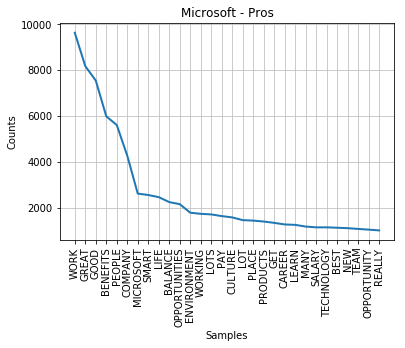

In [8]:
# Plots word distribution.
microsoft_pros.plot(30,title='Microsoft - Pros')

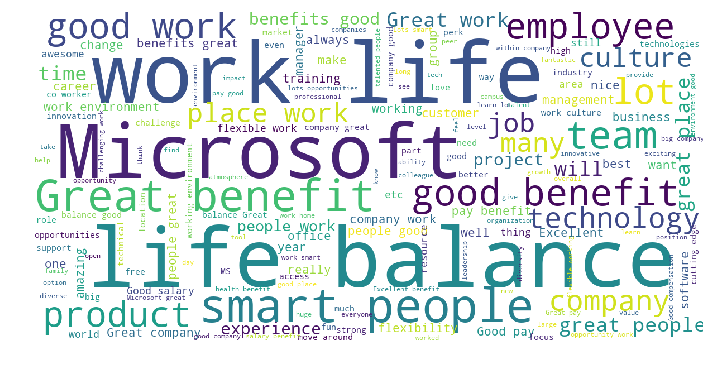

In [9]:
show_wc('microsoft', 'pros')

In [ ]:
# DEPRECIATED

# Cycle through rows and write pros review values to a single long text file.
# with open('pros.txt', 'w') as pros:
#     for index, row in df.iterrows():
#         pros_holder = row['pros']
#         pros.write(pros_holder+'\n')
# pros.close()

# # Cycle through rows and write cons review values to a single long text file.
# with open('cons.txt', 'w') as cons:
#     for index, row in df.iterrows():
#         cons_holder = row['cons']
#         cons.write(cons_holder+'\n')
# cons.close()

# Opens Pros text file, removes punctuation and numbers.

# with open('pros.txt', 'r') as pros:
#     prostext = pros.read()
#     proswords = prostext
#     proswords = proswords.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
#     proswords = proswords.translate(str.maketrans(string.digits, ' '*len(string.digits)))
#     proswords = proswords.translate(str.maketrans(string.ascii_lowercase, string.ascii_uppercase))
#     prostoken = nltk.word_tokenize(proswords)
# pros.close()
    
# Creates a list of tokens after stopwords filtered out.
# filteredpros=[]
# for w in prostoken:
#     if w not in stopcaps:
#         filteredpros.append(w)        
# prosdist = FreqDist(filteredpros)

# Print out 50 most commonly used tokens.
# prosdist.most_common(50)